# R-OSSE



The R-OSSE set of parametric equations (M. Batík 2022) define a complete waveguide terminated into a free space by means of a convenient analytical description. For more info see: https://at-horns.eu/release/R-OSSE%20Waveguide%20rev7.pdf 

#### Design - Parameter Description - Unit

R   - Waveguide outer radius          - [mm]

a   - Nominal coverage angle (*0.5)   - [deg]

r0  - Throat radius                   - [mm]

a0  - Throat opening angle (*0.5)     - [deg]

k   - Throat expansion factor         - [-]

r   - Apex radius factor              - [-]

m   - Apex shift factor               - [-]

b   - Bending factor                  - [-]

q   - Throat shape factor             - [-]

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def degrees_to_radian(angle):
    return angle / 360 * 2 * np.pi

In [3]:
def common_parameters(k, alpha_0, r_0, alpha, R):
    alpha_0 = degrees_to_radian(alpha_0)
    alpha = degrees_to_radian(alpha)
    c_1 = (k * r_0) ** 2
    c_2 = 2 * k * r_0 * np.tan(alpha_0)
    c_3 = np.tan(alpha) ** 2
    L = (1 / (2 * c_3)) * np.sqrt(
        c_2**2 - 4 * c_3 * (c_1 - (R + r_0 * (k - 1)) ** 2)
    ) - c_2
    return c_1, c_2, c_3, L

In [4]:
def Xt(
    t,
    k,
    alpha_0,
    r_0,
    alpha,
    q,
    r,
    m,
    b,
    R,
):
    c_1, c_2, c_3, L = common_parameters(k, alpha_0, r_0, alpha, R)
    x_1 = L * (np.sqrt(r**2 + m**2) - np.sqrt(r**2 + (t - m) ** 2))
    x_2 = b * L * (np.sqrt(r**2 + (1 - m) ** 2) - np.sqrt(r**2 + m**2)) * t**2
    return x_1 + x_2

In [5]:
def Yt(
    t,
    k,
    alpha_0,
    r_0,
    alpha,
    q,
    r,
    m,
    b,
    R,
):
    c_1, c_2, c_3, L = common_parameters(k, alpha_0, r_0, alpha, R)
    y_1 = np.sqrt(c_1 + c_2 * L * t + c_3 * (L * t) ** 2) + r_0 * (1 - k)
    y_2 = R + L * (1 - np.sqrt(1 + c_3 * (t - 1) ** 2))
    return (1 - t**q) * y_1 + (t**q) * y_2

## Example
This is an approximation of the device known as ST260, made freely available for audio hobbyists by M. Batík. 

In [6]:
t1 = 0.0
t2 = 1
t = np.linspace(t1, t2, 100)

R = 130
alpha = 39
r_0 = 12.7
alpha_0 = 7.5

m = 0.8
r = 0.3
q = 3.7
k = 1.8
b = 0.3

x = Xt(t=t, k=k, alpha_0=alpha_0, r_0=r_0, alpha=alpha, q=q, r=r, m=m, b=b, R=R)
y = Yt(t=t, k=k, alpha_0=alpha_0, r_0=r_0, alpha=alpha, q=q, r=r, m=m, b=b, R=R)

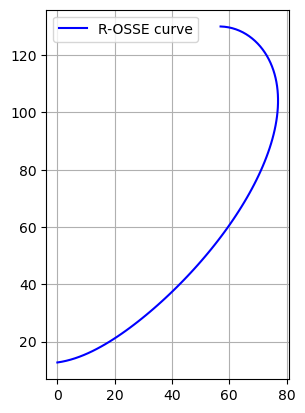

In [7]:
%matplotlib inline


plt.plot(x, y, "b", label="R-OSSE curve")
plt.grid()
ax = plt.gca()
ax.set_aspect("equal")
plt.legend()
plt.draw()
plt.show()